In [1]:
!pip install ultralytics

     -------------------------------------- 709.3/709.3 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 4.6 MB/s eta 0:00:00
     -------------------------------------- 198.6/198.6 MB 1.4 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1
    Uninstalling torch-1.12.1:
      Successfully uninstalled torch-1.12.1


In [2]:
!pip install opencv-python

In [1]:
import numpy as np
import pandas as pd
from ultralytics import YOLO
import cv2
import PIL
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import os
import pathlib

In [2]:
model = YOLO("yolov8m.pt")

In [9]:
results = model.predict(source=r"D:\yoloPractice\1478019972180014279.jpg",save=True,conf=0.2,iou=0.5)


image 1/1 D:\yoloPractice\1478019972180014279.jpg: 416x640 2 cars, 2371.6ms
Speed: 34.0ms preprocess, 2371.6ms inference, 716.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict


In [10]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [11]:
result = results[0]

In [12]:
# finding the detailed result(Class, Coordinates, Prob)

for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [166, 142, 184, 156]
Probability: 0.64
---
Object type: car
Coordinates: [185, 142, 196, 149]
Probability: 0.4
---


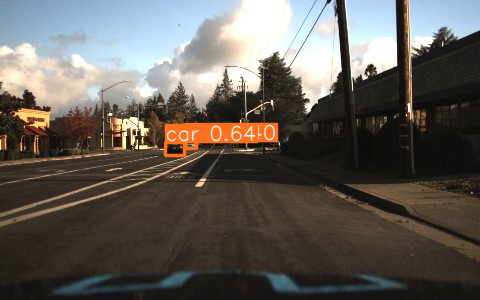

In [14]:
res_plotted = results[0].plot()
res_plotted = cv2.cvtColor(res_plotted,cv2.COLOR_BGR2RGB)
display(Image.fromarray(res_plotted))

In [4]:
import random
from glob import glob

In [5]:
file_path = r"D:\yoloPractice\carDataset\images2\*"
num_samples = 5
images_data = glob(file_path)
random_image_set = random.sample(images_data,num_samples)

In [6]:
images = []
for i in range(num_samples):
    yolo_model = model.predict(random_image_set)
    result = yolo_model[0]
    box = result.boxes
    print("box",box)
    names = result.names
    print("names",names)
    
    for j in range(len(box)):
        labels = names[box.cls[j].item()]; print('labels', labels)
        coordinates = box.xyxy[j].tolist(); print("coordinates", coordinates); 
        confidence = np.round(box.conf[j].item(), 2); print("confidence", confidence); 
        
        print(f'Object {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')
        
    # Store the image in the 'images' list
    images.append(result.plot()[:, :, ::-1])


0: 416x640 6 cars, 1 truck, 6 traffic lights, 1: 416x640 5 cars, 1 truck, 3 traffic lights, 2: 416x640 5 cars, 1 truck, 4 traffic lights, 3: 416x640 5 cars, 1 truck, 4 traffic lights, 4: 416x640 6 cars, 2 trucks, 4 traffic lights, 7236.1ms
Speed: 10.8ms preprocess, 1447.2ms inference, 22.6ms postprocess per image at shape (1, 3, 416, 640)
box ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 7., 2., 2., 9., 9., 2., 2., 2., 9., 9., 9., 9.])
conf: tensor([0.9207, 0.9120, 0.7755, 0.7695, 0.7338, 0.7017, 0.6534, 0.6390, 0.6017, 0.5776, 0.3859, 0.3580, 0.3236])
data: tensor([[2.0895e+02, 1.3491e+02, 2.7247e+02, 1.8282e+02, 9.2067e-01, 2.0000e+00],
        [3.0722e+02, 1.2502e+02, 4.0799e+02, 1.8686e+02, 9.1196e-01, 7.0000e+00],
        [1.4744e+01, 1.3902e+02, 4.7499e+01, 1.5521e+02, 7.7555e-01, 2.0000e+00],
        [9.2007e+01, 1.3609e+02, 1.1483e+02, 1.5115e+02, 7.6948e-01, 2.0000e+00],
        [2.4056e+02, 8.2929e+01, 2.4643e+02, 9.6809e+01, 7.3376e-01, 9.0000e+

0: 416x640 6 cars, 1 truck, 6 traffic lights, 1: 416x640 5 cars, 1 truck, 3 traffic lights, 2: 416x640 5 cars, 1 truck, 4 traffic lights, 3: 416x640 5 cars, 1 truck, 4 traffic lights, 4: 416x640 6 cars, 2 trucks, 4 traffic lights, 7274.8ms
Speed: 10.4ms preprocess, 1455.0ms inference, 5.0ms postprocess per image at shape (1, 3, 416, 640)
box ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 7., 2., 2., 9., 9., 2., 2., 2., 9., 9., 9., 9.])
conf: tensor([0.9207, 0.9120, 0.7755, 0.7695, 0.7338, 0.7017, 0.6534, 0.6390, 0.6017, 0.5776, 0.3859, 0.3580, 0.3236])
data: tensor([[2.0895e+02, 1.3491e+02, 2.7247e+02, 1.8282e+02, 9.2067e-01, 2.0000e+00],
        [3.0722e+02, 1.2502e+02, 4.0799e+02, 1.8686e+02, 9.1196e-01, 7.0000e+00],
        [1.4744e+01, 1.3902e+02, 4.7499e+01, 1.5521e+02, 7.7555e-01, 2.0000e+00],
        [9.2007e+01, 1.3609e+02, 1.1483e+02, 1.5115e+02, 7.6948e-01, 2.0000e+00],
        [2.4056e+02, 8.2929e+01, 2.4643e+02, 9.6809e+01, 7.3376e-01, 9.0000e+00

0: 416x640 6 cars, 1 truck, 6 traffic lights, 1: 416x640 5 cars, 1 truck, 3 traffic lights, 2: 416x640 5 cars, 1 truck, 4 traffic lights, 3: 416x640 5 cars, 1 truck, 4 traffic lights, 4: 416x640 6 cars, 2 trucks, 4 traffic lights, 6602.2ms
Speed: 7.4ms preprocess, 1320.4ms inference, 3.6ms postprocess per image at shape (1, 3, 416, 640)
box ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 7., 2., 2., 9., 9., 2., 2., 2., 9., 9., 9., 9.])
conf: tensor([0.9207, 0.9120, 0.7755, 0.7695, 0.7338, 0.7017, 0.6534, 0.6390, 0.6017, 0.5776, 0.3859, 0.3580, 0.3236])
data: tensor([[2.0895e+02, 1.3491e+02, 2.7247e+02, 1.8282e+02, 9.2067e-01, 2.0000e+00],
        [3.0722e+02, 1.2502e+02, 4.0799e+02, 1.8686e+02, 9.1196e-01, 7.0000e+00],
        [1.4744e+01, 1.3902e+02, 4.7499e+01, 1.5521e+02, 7.7555e-01, 2.0000e+00],
        [9.2007e+01, 1.3609e+02, 1.1483e+02, 1.5115e+02, 7.6948e-01, 2.0000e+00],
        [2.4056e+02, 8.2929e+01, 2.4643e+02, 9.6809e+01, 7.3376e-01, 9.0000e+00]

0: 416x640 6 cars, 1 truck, 6 traffic lights, 1: 416x640 5 cars, 1 truck, 3 traffic lights, 2: 416x640 5 cars, 1 truck, 4 traffic lights, 3: 416x640 5 cars, 1 truck, 4 traffic lights, 4: 416x640 6 cars, 2 trucks, 4 traffic lights, 6545.2ms
Speed: 6.8ms preprocess, 1309.0ms inference, 5.0ms postprocess per image at shape (1, 3, 416, 640)
box ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 7., 2., 2., 9., 9., 2., 2., 2., 9., 9., 9., 9.])
conf: tensor([0.9207, 0.9120, 0.7755, 0.7695, 0.7338, 0.7017, 0.6534, 0.6390, 0.6017, 0.5776, 0.3859, 0.3580, 0.3236])
data: tensor([[2.0895e+02, 1.3491e+02, 2.7247e+02, 1.8282e+02, 9.2067e-01, 2.0000e+00],
        [3.0722e+02, 1.2502e+02, 4.0799e+02, 1.8686e+02, 9.1196e-01, 7.0000e+00],
        [1.4744e+01, 1.3902e+02, 4.7499e+01, 1.5521e+02, 7.7555e-01, 2.0000e+00],
        [9.2007e+01, 1.3609e+02, 1.1483e+02, 1.5115e+02, 7.6948e-01, 2.0000e+00],
        [2.4056e+02, 8.2929e+01, 2.4643e+02, 9.6809e+01, 7.3376e-01, 9.0000e+00]

0: 416x640 6 cars, 1 truck, 6 traffic lights, 1: 416x640 5 cars, 1 truck, 3 traffic lights, 2: 416x640 5 cars, 1 truck, 4 traffic lights, 3: 416x640 5 cars, 1 truck, 4 traffic lights, 4: 416x640 6 cars, 2 trucks, 4 traffic lights, 7373.8ms
Speed: 4.8ms preprocess, 1474.8ms inference, 8.4ms postprocess per image at shape (1, 3, 416, 640)
box ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 7., 2., 2., 9., 9., 2., 2., 2., 9., 9., 9., 9.])
conf: tensor([0.9207, 0.9120, 0.7755, 0.7695, 0.7338, 0.7017, 0.6534, 0.6390, 0.6017, 0.5776, 0.3859, 0.3580, 0.3236])
data: tensor([[2.0895e+02, 1.3491e+02, 2.7247e+02, 1.8282e+02, 9.2067e-01, 2.0000e+00],
        [3.0722e+02, 1.2502e+02, 4.0799e+02, 1.8686e+02, 9.1196e-01, 7.0000e+00],
        [1.4744e+01, 1.3902e+02, 4.7499e+01, 1.5521e+02, 7.7555e-01, 2.0000e+00],
        [9.2007e+01, 1.3609e+02, 1.1483e+02, 1.5115e+02, 7.6948e-01, 2.0000e+00],
        [2.4056e+02, 8.2929e+01, 2.4643e+02, 9.6809e+01, 7.3376e-01, 9.0000e+00]

In [7]:
len(images)

5

In [9]:
images[0]

array([[[151, 188, 240],
        [140, 176, 226],
        [140, 176, 224],
        ...,
        [251, 250, 255],
        [255, 254, 255],
        [253, 252, 255]],

       [[158, 194, 246],
        [154, 190, 242],
        [162, 195, 246],
        ...,
        [253, 252, 255],
        [255, 254, 255],
        [252, 251, 255]],

       [[160, 195, 249],
        [161, 194, 247],
        [168, 201, 252],
        ...,
        [255, 254, 255],
        [244, 243, 248],
        [255, 254, 255]],

       ...,

       [[ 30,  31,  26],
        [ 30,  31,  26],
        [ 30,  31,  26],
        ...,
        [ 35,  35,  35],
        [ 35,  35,  35],
        [ 34,  34,  34]],

       [[ 29,  30,  25],
        [ 29,  30,  25],
        [ 29,  30,  25],
        ...,
        [ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33]],

       [[ 28,  29,  24],
        [ 28,  29,  24],
        [ 28,  29,  24],
        ...,
        [ 32,  32,  32],
        [ 32,  32,  32],
        [ 32,  32,  32]]

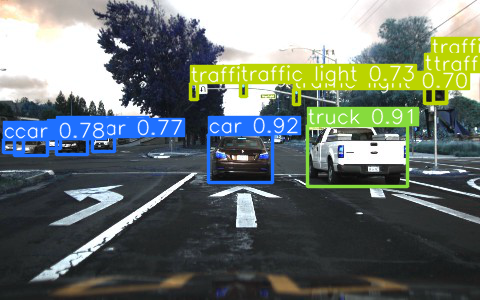

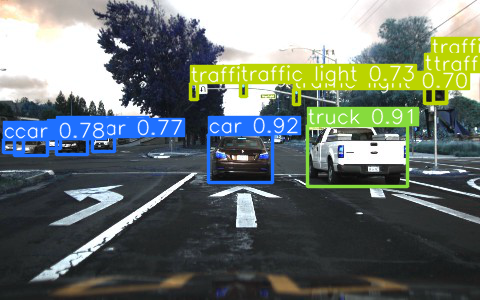

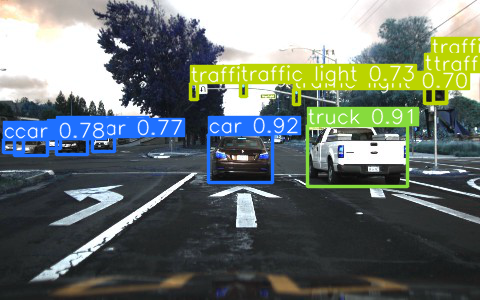

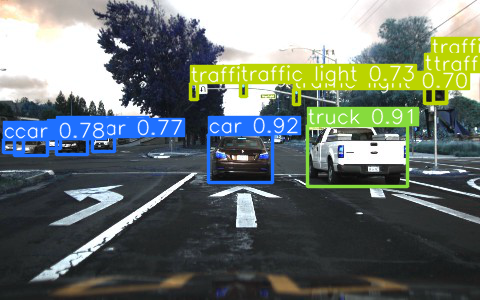

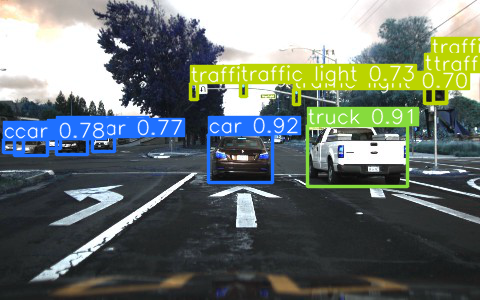

In [14]:
for i in images:
    res_plotted = cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
    display(Image.fromarray(res_plotted))